# PyTorch Neural Networks

[PyTorch](https://pytorch.org/) is a Python package for defining and training neural networks.  Neural networks and deep learning have been a hot topic for several years, and are the tools underlying many state-of-the art machine learning tasks.  There are many industrial applications (e.g. at your favorite or least favorite companies in Silicon Valley), but also many scientific applications including
* Processing data in particle detectors
* Seismic imaging / medical imaging
* Accelerating simulations of physical phenomena
* ...

A (deep) feed-forward neural network is the composition of functions
\begin{equation}
f_N(x; w_N, b_N) \circ f_{N-1}(x; w_{N-1}, b_{N-1}) \circ \dots f_0(x; w_0, b_0)
\end{equation}
where each $f_i(x; w_i, b_i)$ is a (non-linear) function with learnable parameters $w_i, b_i$.  There are many choices for what the exact function is.  A common and simple one to describe is an (affine) linear transformation followed by a non-linearity.
\begin{equation}
f_i(x; w_i, b_i) = (w_i \cdot x + b_i)_+
\end{equation}

where $w_i \cdot x$ is matrix-vector multiplication, and $(\cdot)_+$ is the ReLU operation (Rectified Linear Unit)
\begin{equation}
x_+ = \begin{cases}
x & x > 0\\
0 & x \le 0
\end{cases}
\end{equation}

If you take the composition of several functions like this, you have a multilayer perceptron (MLP).


## Deep Learning Libraries

There are many deep learning libraries available, the most common ones for python are

- TensorFlow, Keras
- PyTorch

Working with tensorflow requires going into lot of details of the contruction of the computation graph, whereas Keras is a higher level interface for tensorflow. Tensorflow is very popular in the industry and good for production code.

PyTorch can be used as low level interface, but is much more user-friendly than tensorflow, but it also has a higher level interface. Pytorch is more popular in the research community.

### Main features that any deep learning library should provide

No matter what library or language you use, the main features provided by a deep learning library are 
1. Use the GPU to speed up computation 
2. Ability to do automatic differentiation
3. Useful library functions for common architectures and optimization algorithms

### PyTorch
We will look at all of the above in pytorch.
The best way to think about pytorch is that its numpy + GPU + autograd.

You can install it with

```conda install pytorch```.

Alternatively (and recommended), run this notebook in Google Colab-- it provides an environment with all of the PyTorch dependencies plus a GPU free of charge.

In [188]:
import torch
import numpy as np
import matplotlib.pyplot as plt
torch.__version__

'1.4.0'

## Automatic Differentiation

[Automatic differentiation](https://en.wikipedia.org/wiki/Automatic_differentiation) is different from numerical differentiation, which requires a choice of step size, and symbolic differentiation which creates a single expression for a derivative.  Instead it performs chain rule repeatedly.

PyTorch uses dynamic computation graphs to compute the gradients of the parameters.

In [189]:
x = torch.tensor([2.0])
m = torch.tensor([5.0], requires_grad = True)
c = torch.tensor([2.0], requires_grad = True)

In [190]:
y = m*x + c
y

tensor([12.], grad_fn=<AddBackward0>)

Define an error for your function

In [191]:
loss = torch.norm( y - 13)
loss

tensor(1., grad_fn=<NormBackward0>)

In [194]:
m.grad

Calling `x.backward()` on any tensor forces pytorch to compute all the gradients of the tensors used to compute `x` which had the `requires_grad` flag set to `True`. The computed gradient will be stored in the `.grad` property of the tensors

In [195]:
loss.backward()

In [196]:
m.grad

tensor([-2.])

In [200]:
c.grad

tensor([-1.])

In [202]:
with torch.no_grad():
    m -= 0.01 * m.grad
    c -= 0.3 * c.grad

In [203]:
m,c

(tensor([5.0400], requires_grad=True), tensor([2.6000], requires_grad=True))

In [204]:
m.grad, c.grad

(tensor([-2.]), tensor([-1.]))

In [206]:
m.grad.zero_()
c.grad.zero_()

m.grad, c.grad

(tensor([0.]), tensor([0.]))

In [207]:
y = m*x + c
y

tensor([12.6800], grad_fn=<AddBackward0>)

In [208]:
loss = torch.norm( y - 13)
loss

tensor(0.3200, grad_fn=<NormBackward0>)

In [209]:
loss.backward()
m.grad, c.grad

(tensor([-2.]), tensor([-1.]))

### Making it more compact

In [210]:
def model_fn(x,m,c):
    return m*x + c

def loss_fn(y,yt):
    return torch.norm(y-yt)

In [211]:
m = torch.tensor([5.0], requires_grad = True)
c = torch.tensor([2.0], requires_grad = True)

In [212]:
x = torch.tensor([2.0])
yt = torch.tensor([13.0])

In [213]:
y = model_fn(x,m,c)
loss = loss_fn(y,yt)
loss.backward()
with torch.no_grad():
    m -= 0.05 * m.grad
    c -= 0.05 * c.grad
m.grad.zero_()
c.grad.zero_()

print( f" m = {m}\n c = {c}\n y = {y}\n loss = {loss}")
#note that 'loss' indicates the loss for the previous m,c values

 m = tensor([5.1000], requires_grad=True)
 c = tensor([2.0500], requires_grad=True)
 y = tensor([12.], grad_fn=<AddBackward0>)
 loss = 1.0


Here's an explicit loop:

loss = 135.52967834472656
loss = 106.52214050292969
loss = 78.19770050048828
loss = 51.47962951660156
loss = 29.748573303222656
loss = 22.29718017578125
loss = 22.245311737060547
loss = 22.24411392211914
loss = 22.24404525756836
loss = 22.24402618408203
loss = 22.24403190612793
loss = 22.244029998779297
loss = 22.24403190612793
loss = 22.24403190612793
loss = 22.24403190612793
loss = 22.244028091430664
loss = 22.244035720825195
loss = 22.244033813476562
loss = 22.244035720825195
loss = 22.244035720825195
loss = 22.244035720825195
loss = 22.244035720825195
loss = 22.244033813476562
loss = 22.244035720825195
loss = 22.244035720825195
loss = 22.244035720825195
loss = 22.244035720825195
loss = 22.244035720825195
loss = 22.244033813476562
loss = 22.244035720825195
loss = 22.244035720825195
loss = 22.244033813476562
loss = 22.244035720825195
loss = 22.244035720825195
loss = 22.244033813476562
loss = 22.244035720825195
loss = 22.244033813476562
loss = 22.244035720825195
loss = 22.244035720825

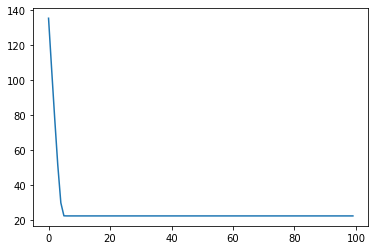

In [214]:
x = torch.randn(5,100)
yt = torch.randn(1,100)
losses = []

for i in range(100):
    y = model_fn(x,m,c)
    loss = loss_fn(y,yt)
    loss.backward()
    with torch.no_grad():
        m -= 0.05 * m.grad
        c -= 0.05 * c.grad
    m.grad.zero_()
    c.grad.zero_()

    losses+=[loss.item()]
    print( f"loss = {loss}")

plt.plot(losses);

## Using Library functions

The subpackage `torch.nn` provides an object-oriented library of functions that can be composed together.


In [216]:
model = torch.nn.Sequential(
    torch.nn.Linear(5, 5), # 5 x 5 matrix
    torch.nn.ReLU(),       # ReLU nonlinearity
    torch.nn.Linear(5, 5), # 5 x 5 matrix
)

In [224]:
list(model.parameters())

[Parameter containing:
 tensor([[-0.0670, -0.2266,  0.2436, -0.1265,  0.3359],
         [ 0.2764, -0.0563,  0.3112,  0.3026, -0.1334],
         [-0.2847, -0.0901, -0.3842,  0.1007, -0.0701],
         [ 0.1516, -0.1606,  0.3589,  0.0789, -0.0376],
         [-0.3211,  0.2877, -0.3530,  0.3246,  0.3301]], requires_grad=True),
 Parameter containing:
 tensor([-0.0167,  0.2621,  0.0565,  0.2851, -0.2834], requires_grad=True),
 Parameter containing:
 tensor([[ 0.1517, -0.1053, -0.3044, -0.0560, -0.1072],
         [-0.1624,  0.3813, -0.2169, -0.1347,  0.2819],
         [ 0.2953,  0.1252,  0.4313, -0.0116, -0.2964],
         [ 0.2774, -0.1723,  0.1838,  0.4383, -0.0009],
         [ 0.0171, -0.3358,  0.2332, -0.0717,  0.0412]], requires_grad=True),
 Parameter containing:
 tensor([-0.3518,  0.1369, -0.2293, -0.3390, -0.0978], requires_grad=True)]

In [221]:
loss_fn = torch.nn.MSELoss(reduction='sum')

In this case, we'll just fit the model to random data.

In [223]:
x = torch.randn(100,5)
yt = torch.randn(100,5)
losses = []

Optimizers in `torch.optim` implement a variety of optimization strategies.  Almost all are based on gradient descent, since forming Hessians is prohibitive.

In [227]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.03)

loss = 555.8739624023438
loss = 531.7855834960938
loss = 520.6388549804688
loss = 514.991943359375
loss = 512.298583984375
loss = 511.4376220703125
loss = 511.6736755371094
loss = 512.5502319335938
loss = 513.7633056640625
loss = 515.0668334960938
loss = 516.3837890625
loss = 517.6197509765625
loss = 518.6918334960938
loss = 519.589599609375
loss = 520.2914428710938
loss = 520.7738647460938
loss = 521.036865234375
loss = 521.1044311523438
loss = 520.9827880859375
loss = 520.7198486328125
loss = 520.3363037109375
loss = 519.8252563476562
loss = 519.2021484375
loss = 518.48876953125
loss = 517.704833984375
loss = 516.869384765625
loss = 515.986083984375
loss = 515.0643310546875
loss = 514.1414794921875
loss = 513.2467651367188
loss = 512.3675537109375
loss = 511.4700927734375
loss = 510.5550842285156
loss = 509.6373291015625
loss = 508.71240234375
loss = 507.7746887207031
loss = 506.8238830566406
loss = 505.8692626953125
loss = 504.9159851074219
loss = 503.96893310546875
loss = 503.03457

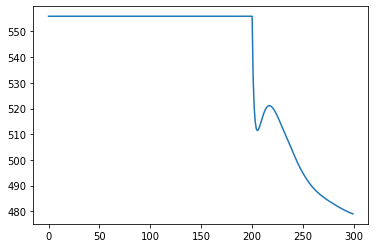

In [228]:
for i in range(100):
    y = model(x)
    loss = loss_fn(y,yt)
    loss.backward()

    optimizer.step()
    optimizer.zero_grad()

    losses+=[loss.item()]
    print( f"loss = {loss}")
    
plt.plot(losses);

## MNIST Example

First, you'll want to install the `torchvision` package - this is a package for PyTorch that provides a variety of computer vision functionality.

The [MNIST data set](http://yann.lecun.com/exdb/mnist/) consists of a collection of handwritten digits (0-9).  Our goal is to train a neural net which will classify the image of each digit as the correct digit

```
conda install torchvision -c pytorch
```

In [229]:
import torchvision

In [145]:
from torchvision.datasets import MNIST

In [146]:
data = MNIST(".",download=True)

6.6%

100.1%

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw


68.6%%

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw


180.4%

Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw
Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw
Processing...
Done!


In [147]:
len(data)

60000

In [168]:
import numpy as np
img,y = data[2]
print(y)
img

4


In [169]:
data.train_data[2].shape

torch.Size([28, 28])

In [170]:
data.train_labels[2]

tensor(4)

### MNIST Training

In [178]:
model = torch.nn.Sequential(
    torch.nn.Linear(784, 100),
    torch.nn.ReLU(),
    torch.nn.Linear(100, 100),
    torch.nn.ReLU(),
    torch.nn.Linear(100, 10),
)

In [176]:
loss_fn = torch.nn.CrossEntropyLoss()

In [179]:
sample = np.random.choice(range(len(data.train_data)),1000)
x = data.train_data[sample].reshape(1000,-1).float()/255
yt = data.train_labels[sample]

In [180]:
x.shape,yt.shape

(torch.Size([1000, 784]), torch.Size([1000]))

In [181]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.03)
losses = []

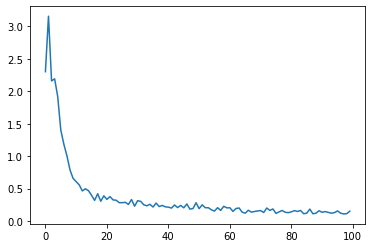

In [182]:
for i in range(100):
    
    sample = np.random.choice(range(len(data.train_data)),1000)
    x = data.train_data[sample].reshape(1000,-1).float()/255
    yt = data.train_labels[sample]
    
    y = model(x)
    loss = loss_fn(y,yt)
    loss.backward()

    optimizer.step()
    optimizer.zero_grad()

    losses+=[loss.item()]
    #print( f"loss = {loss}")
plt.plot(losses);

In [183]:
x_test = data.train_data[-1000:].reshape(1000,-1).float()/255
y_test = data.train_labels[-1000:]

In [184]:
with torch.no_grad():
    y_pred = model(x_test)

In [185]:
print("Accuracy = ", (y_pred.argmax(dim=1) == y_test).sum().float().item()/1000.0)

Accuracy =  0.98


### Credits

This notebook was adapted from a notebook from [CME 193 at Stanford](https://github.com/icme/cme193)